In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('zomato.csv')

In [3]:
df.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
df.isnull().sum().sort_values(ascending=False)

dish_liked                     28078
rate                            7775
phone                           1208
approx_cost(for two people)      346
rest_type                        227
cuisines                          45
location                          21
listed_in(type)                    0
menu_item                          0
reviews_list                       0
url                                0
address                            0
votes                              0
book_table                         0
online_order                       0
name                               0
listed_in(city)                    0
dtype: int64

In [7]:
df.drop(columns=['url','address','phone'],inplace =True)

In [8]:
df.dropna(subset=['rest_type', 'approx_cost(for two people)'], inplace=True)

In [9]:
df.drop(columns=['listed_in(city)','reviews_list','menu_item'],inplace =True)

In [10]:
df.dropna(subset=['location','cuisines'],inplace=True)

In [11]:
df.isnull().sum().sort_values(ascending=False)

dish_liked                     27713
rate                            7615
name                               0
online_order                       0
book_table                         0
votes                              0
location                           0
rest_type                          0
cuisines                           0
approx_cost(for two people)        0
listed_in(type)                    0
dtype: int64

In [12]:
df.drop(columns=['dish_liked'],inplace =True)

In [13]:
df.isnull().sum().sort_values(ascending=False)

rate                           7615
name                              0
online_order                      0
book_table                        0
votes                             0
location                          0
rest_type                         0
cuisines                          0
approx_cost(for two people)       0
listed_in(type)                   0
dtype: int64

In [14]:
df['rate'].fillna('3.5/5',inplace=True)

In [15]:
def rating(s):
    ans = s.split('/')
    return ans[0]

In [16]:
df['new_rate'] = df['rate'].apply(rating)

In [17]:
df['new_rate']

0         4.1
1         4.1
2         3.8
3         3.7
4         3.8
         ... 
51712    3.6 
51713     3.5
51714     3.5
51715    4.3 
51716    3.4 
Name: new_rate, Length: 51148, dtype: object

In [18]:
df.new_rate.unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [19]:
def fill(row):
    if row=='NEW':
        return '3.5'
    elif row == '-':
        return '3.5'
    else :
        return row

In [20]:
df['new_rate']=df.new_rate.apply(fill)

In [21]:
df['new_rate']=df['new_rate'].astype(float)

In [22]:
df.shape

(51148, 11)

<AxesSubplot:>

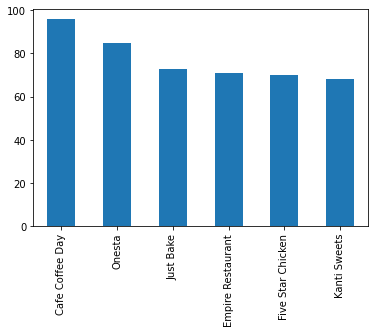

In [23]:
df.name.value_counts()[:6].plot(kind = 'bar')

In [24]:
df[df['votes'] == df.votes.max()].name.unique()[0]

'Byg Brewski Brewing Company'

<function matplotlib.pyplot.show(close=None, block=None)>

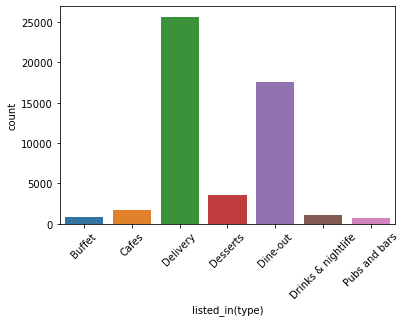

In [25]:
sns.countplot(data=df,x='listed_in(type)')
plt.xticks(rotation=45)
plt.show

In [26]:
df.head(10)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),new_rate
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,4.1
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,4.1
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,3.8
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,3.7
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,3.8
5,Timepass Dinner,Yes,No,3.8/5,286,Basavanagudi,Casual Dining,North Indian,600,Buffet,3.8
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800,Buffet,3.6
7,Onesta,Yes,Yes,4.6/5,2556,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600,Cafes,4.6
8,Penthouse Cafe,Yes,No,4.0/5,324,Banashankari,Cafe,"Cafe, Italian, Continental",700,Cafes,4.0
9,Smacznego,Yes,No,4.2/5,504,Banashankari,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550,Cafes,4.2


<AxesSubplot:ylabel='book_table'>

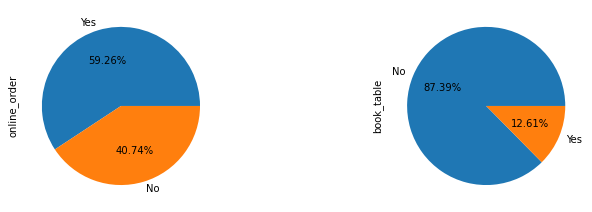

In [27]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
df['online_order'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.subplot(2,2,2)
df['book_table'].value_counts().plot(kind='pie', autopct='%.2f%%')

#categorical data

In [28]:
df['location'].value_counts().sort_values(ascending = False)[:10]

BTM                      5071
HSR                      2496
Koramangala 5th Block    2481
JP Nagar                 2219
Whitefield               2109
Indiranagar              2033
Jayanagar                1916
Marathahalli             1808
Bannerghatta Road        1611
Bellandur                1271
Name: location, dtype: int64

In [29]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].apply(lambda x:  int(x.replace(',','')))

In [30]:
df['approx_cost(for two people)']

0         800
1         800
2         800
3         300
4         600
         ... 
51712    1500
51713     600
51714    2000
51715    2500
51716    1500
Name: approx_cost(for two people), Length: 51148, dtype: int64

C:\Users\Kaushik sakre\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='new_rate', ylabel='Density'>

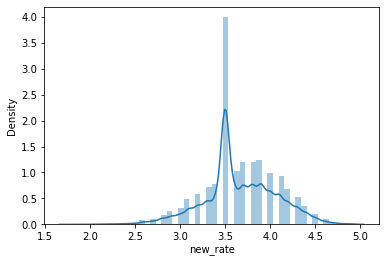

In [31]:
sns.distplot(df['new_rate'])

Almost more than 50 percent of restaurants has rating between 3 and 4.
Restaurants having rating more than 4.5 are very rare

C:\Users\Kaushik sakre\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='Density'>

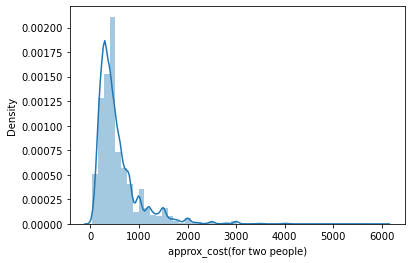

In [32]:
sns.distplot(df['approx_cost(for two people)'])

We can see that the distribution if left skewed.
This means almost 90percent of restaurants serve food for budget less than 1000 INR.($15)

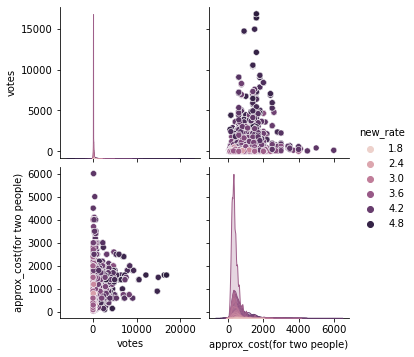

In [33]:
sns.pairplot(df,hue='new_rate')

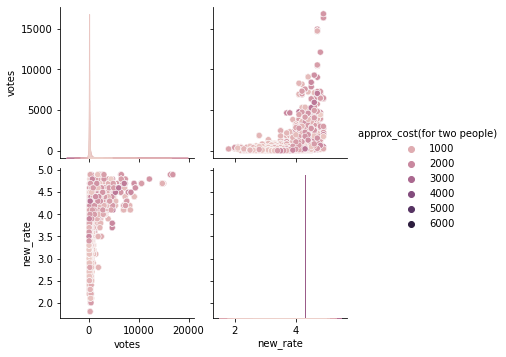

In [34]:
sns.pairplot(df,hue='approx_cost(for two people)')